# 算法原理

因子分析法是指从研究指标相关矩阵内部的依赖关系出发，把一些信息重叠、具有错综复杂关系的变量归结为少数几个不相关的综合因子的一种多元统计分析方法。基本思想是：根据相关性大小把变量分组，使得同组内的变量之间相关性较高，但不同组的变量不相关或相关性较低，每组变量代表一个基本结构一即公共因子。

- 公因子（Factor）：EFA旨在识别影响一组观测变量的共同因素，这些共同因素被称为公因子。每个公因子代表了观测变量间共享的方差部分，可以视为背后的潜在维度。

- 特殊因子（Unique Factor）：除了公因子外，每个观测变量还可能受到只影响该变量本身的特殊因子的影响。这部分方差代表了变量特有的信息，不与其他变量共享。

- 因子载荷（Factor Loading）：因子载荷表示观测变量与其下的因子之间的相关程度，可视为因子对变量的影响大小。载荷值的绝对大小越大，表示变量与因子的关系越紧密。

应用因子分析法的主要步骤如下：

　　(1)对数据样本进行标准化处理。

　　(2)计算样本的相关矩阵R。

　　(3)求相关矩阵R的特征根和特征向量。

　　(4)根据系统要求的累积贡献率确定主因子的个数。

　　(5)计算因子载荷矩阵A。

　　(6)确定因子模型。

　　(7)根据上述计算结果，对系统进行分析。

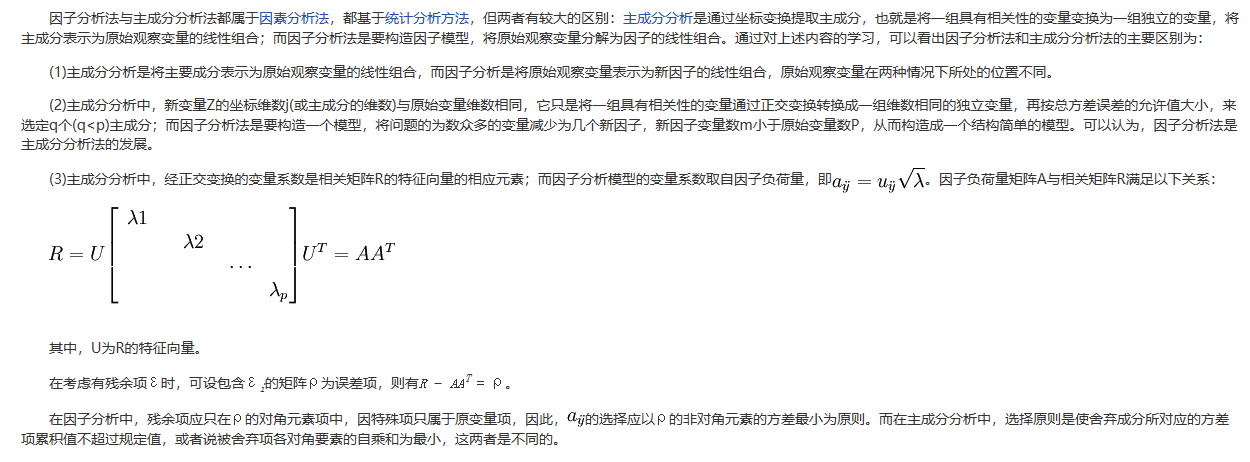

# 数据准备

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from factor_analyzer import FactorAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from factor_analyzer.factor_analyzer import calculate_kmo
import seaborn as sns

In [3]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

In [4]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。

通常取值从0.6开始进行因子分析

In [7]:
# KMO检验
kmo_all,kmo_model=calculate_kmo(x_train)
kmo_model

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8269929227965767

In [14]:
model = FactorAnalyzer(n_factors=5)
model.fit(x_train)
model.loadings_ # 查看载荷矩阵

array([[ 0.97560909, -0.0988701 ,  0.0023394 , -0.18796378,  0.00614683],
       [ 0.06961464, -0.02781548, -0.01893406,  0.17532614,  0.88663155],
       [ 0.96545444, -0.06542148,  0.02928825, -0.17462151,  0.00389907],
       [ 1.00665427, -0.09802954, -0.01804691, -0.10497677, -0.01241608],
       [ 0.12925316,  0.97816571, -0.32258478,  0.30663886, -0.14047241],
       [ 0.27859417,  0.54261467,  0.35248748,  0.0495278 , -0.02192583],
       [ 0.51909205,  0.24870087,  0.4391364 ,  0.01570496, -0.00613048],
       [ 0.73215062,  0.35432169,  0.09544915,  0.01747943, -0.02255023],
       [ 0.06668067,  0.60443576,  0.03309524,  0.24128564,  0.03418263],
       [-0.4792978 ,  0.621228  ,  0.33233855,  0.28954171, -0.11202441],
       [ 0.89107891, -0.04388191, -0.02964551,  0.45904715, -0.03843586],
       [-0.0879877 , -0.13309042,  0.10911681,  0.64765383,  0.4637687 ],
       [ 0.84809569, -0.073337  ,  0.07455581,  0.42921441, -0.03093449],
       [ 0.93297101, -0.06209517, -0.0

为了更直观地观察每个隐藏变量和哪些特征的关系比较大，进行可视化展示，为了方便取上面相关系数的绝对值：

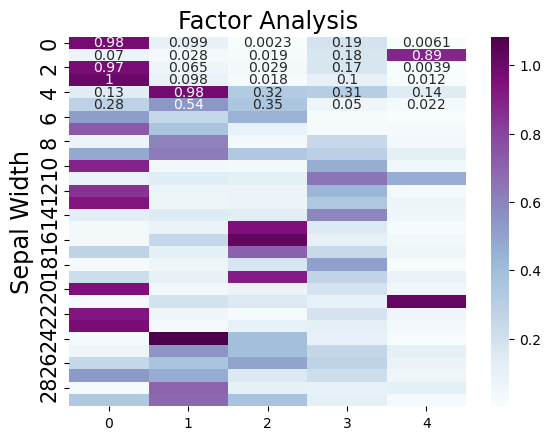

In [18]:
df1 = pd.DataFrame(np.abs(model.loadings_),index=x_train.columns)

# 绘图
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")

# 显示图片
plt.show()

# 模型保存

In [9]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/efa.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/efa.pkl')

In [10]:
# 法二
import pickle

with open('../outputs/best_models/efa.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/efa.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [11]:
# 转换数据
x_new = model.transform(x_train)

In [12]:
x_new.shape

(426, 5)

# 模型应用

In [19]:
# 先对数据降维，再进行分类
efa = FactorAnalyzer(n_factors=5)
efa.fit(x_train)
x_new = efa.transform(x_train)

# 分类模型
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 4]}

#GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(knn, param_grid)
knn = gsearch.fit(x_new, y_train)

#打印最优结果
print('KNN params:', knn.best_estimator_)

KNN params: KNeighborsClassifier(n_neighbors=3)


In [20]:
x_new = efa.transform(x_test)
prediction = knn.predict(x_new)

In [21]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 0.958041958041958


In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

